# Testing Wordcloud lib

* https://amueller.github.io/word_cloud

### Simple Example

In [1]:
import numpy as np
from wordcloud import WordCloud

text = "watts"

x, y = np.ogrid[:100, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(text)

### Printing

#### print image, the matplotlib way

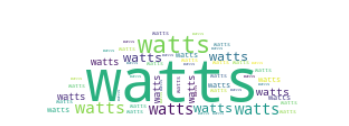

In [6]:
import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

PS saving locally needs to be done before calling `.show()`

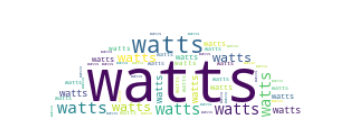

In [13]:
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.savefig("f.png", dpi=100)  # ps changing dpis has little improvements? 

#### print image, the pil way (if you don't have matplotlib)

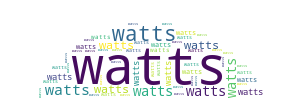

In [4]:
image = wc.to_image()
# image.show() # shows externally 
from IPython.display import display
display(image) # shows inline 

In [5]:
# saving works
image.save(fp="wc.png")  # saves locally

## Reading local text example

In [51]:
stpw = open(path.join(d, 'italian_stopwords.txt')).read()

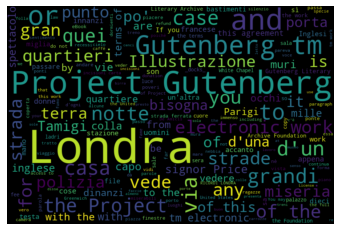

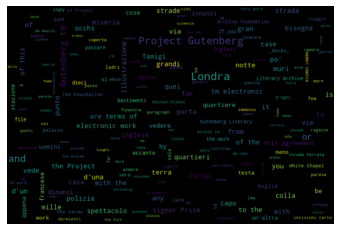

In [64]:
import os
from os import path

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()


stpw = open(path.join(d, 'italian_stopwords.txt')).read()
STOPWORDS = stpw.split("\n")

# Read the whole text.
text = open(path.join(d, 'pg27640 Ricordi di Londra, by Edmondo De Amicis.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud(width=900, height=600, stopwords=STOPWORDS).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("text_cloud1.png", dpi=200)

# lower max_font_size
wordcloud = WordCloud(max_font_size=30, width=900, height=600, stopwords=STOPWORDS).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("text_cloud2.png", dpi=200)
plt.show()

## From frequencies

In [29]:
!pip install multidict

     |████████████████████████████████| 48 kB 278 kB/s eta 0:00:01


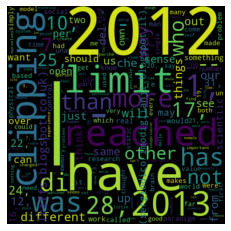

In [30]:
import multidict as multidict

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = open(path.join(d, 'My Clippings.txt')).read()

# a dict of { "stringa" " : freq_no}
text_freq = getFrequencyDictForText(text)

# Generate a word cloud image
wordcloud = WordCloud(width=600, height=600).generate_from_frequencies(text_freq)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("freq_cloud.png", dpi=100)


### manually from a dict

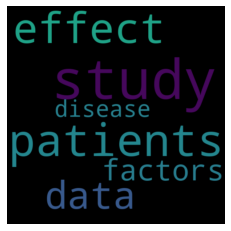

In [46]:
d = {'study': 5707,
 'patients': 3579,
 'effect': 3103,
 'data': 2495,
 'disease': 1899,
 'factors': 2024,
}

wordcloud = WordCloud(width=600, height=600).generate_from_frequencies(d)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("freq_cloud_from_dict.png", dpi=100)

### manually from Dimcli concepts

In [6]:
import matplotlib.pyplot as plt

import dimcli
dimcli.login()
dsl = dimcli.Dsl()

Dimcli - Dimensions API Client (v0.7)
Connected to: https://app.dimensions.ai - DSL v1.25
Method: dsl.ini file


In [3]:
# moog synthesizers
concepts = dsl.query("""
search publications for "moog synthesizers" return publications[id+concepts_scores] limit 500
""").as_dataframe_concepts()

Returned Publications: 500 (total = 2036)


In [4]:
temp = concepts.drop_duplicates("concept").sort_values("score_avg", ascending=False)
dd = temp[['concept', 'frequency']][:150].to_dict(orient="records")
# returns smth like this
# [{'concept': 'study', 'frequency': 5707},
#  {'concept': 'patients', 'frequency': 3579},
d = {x['concept'] : x['frequency'] for x in dd}

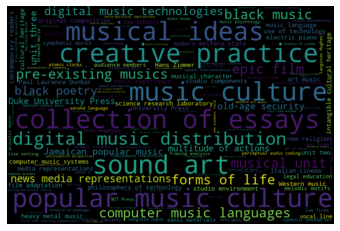

In [7]:
wordcloud = WordCloud(width=900, height=600).generate_from_frequencies(d)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("freq_cloud_from_dimcli.png", dpi=300)

### manually from Dimcli concepts - for a Researcher

In [8]:
import matplotlib.pyplot as plt
import dimcli
dimcli.login()
dsl = dimcli.Dsl()

Dimcli - Dimensions API Client (v0.7)
Connected to: https://app.dimensions.ai - DSL v1.25
Method: dsl.ini file


In [9]:
%dsldf search researchers where first_name="Michele" and last_name="Pasin"

Returned Researchers: 1 (total = 1)


,first_name,last_name,research_orgs,orcid_id,id
0,Michele,Pasin,"[{'id': 'grid.10837.3d', 'longitude': -0.70955...",[0000-0001-8909-7766],ur.013443041077.22


Returned Publications: 44 (total = 44)


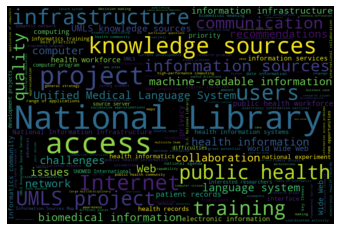

In [13]:
# 
concepts = dsl.query("""
search publications where researchers in ["ur.01312612572.33" ] return publications[id+concepts_scores] limit 1000
""").as_dataframe_concepts()

temp = concepts.drop_duplicates("concept").query("score_avg > 0.3").sort_values('frequency', ascending=False)
data = temp[['concept', 'frequency']][:150].to_dict(orient="records")

# --- returns smth like this
# => [{'concept': 'study', 'frequency': 5707},
# =>  {'concept': 'patients', 'frequency': 3579},
data_dict = {x['concept'] : x['frequency'] for x in data}

wordcloud = WordCloud(width=900, height=600).generate_from_frequencies(data_dict)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("freq_cloud_for_researcher.png", dpi=300)
